# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2016960
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 55 70 58 52 52 63 79 54 58]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [415 406 421 370 369 398 408 419 394 400]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


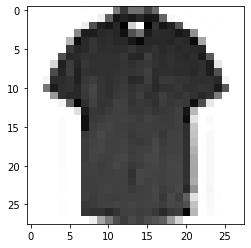

LABEL: 6
INPUT:


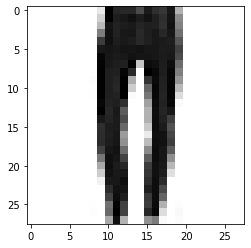

LABEL: 1
INPUT:


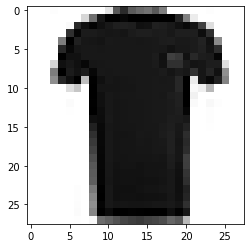

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

clf=GridSearchCV(mlp, parameters, cv=5,return_train_score=True)
clf.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
import pandas as pd
df_lay=pd.DataFrame(clf.cv_results_)
df_lay[['params', 'mean_test_score','mean_fit_time', 'mean_score_time']]

C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (20,)}
Score with best parameters:
0.7849999999999999

All scores on the grid:


,params,mean_test_score,mean_fit_time,mean_score_time
0,"{'hidden_layer_sizes': (10,)}",0.746667,0.843359,0.001001
1,"{'hidden_layer_sizes': (20,)}",0.785000,0.771477,0.001200
2,"{'hidden_layer_sizes': (30,)}",0.771667,0.975440,0.001001
3,"{'hidden_layer_sizes': (20, 20)}",0.781667,0.732571,0.001000
4,"{'hidden_layer_sizes': (30, 30, 20)}",0.650000,0.461230,0.001504


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp_kf = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=(20, ),
                    learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

clf=GridSearchCV(mlp_kf, parameters, cv=kf, return_train_score=True)
clf.fit(X_train,y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
df_batch=pd.DataFrame(clf.cv_results_)
df_batch[['params', 'mean_test_score','mean_fit_time', 'mean_score_time']]

RESULTS FOR NN

Best parameters set found:
{'batch_size': 480}
Score with best parameters:
0.78

All scores on the grid:


,params,mean_test_score,mean_fit_time,mean_score_time
0,{'batch_size': 1},0.103333,10.048632,0.001001
1,{'batch_size': 32},0.723333,0.567555,0.000999
2,{'batch_size': 480},0.780000,0.673120,0.000995


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]


Based on my results, the best hidden layer sets are the single hidden layers, while if we compute the NN with more dimension we achieve worse results.

Regarding the batch sizes, we notice that the batch size 1 is the worst one, this because we do a baseline SGD, while with the batch size 480 we do SG, which leds to a more stable trajectory but we have a long computational time.
In my case, with every batch size we reach the convergence, but for smaller batch size we have more computational time (so sometimes it does not converge).

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 1.61 sec

Training MLP of size (20,) ...
Done, training time: 1.21 sec

Training MLP of size (30,) ...
Done, training time: 0.54 sec

Training MLP of size (30, 20) ...
Done, training time: 0.59 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 0.79 sec



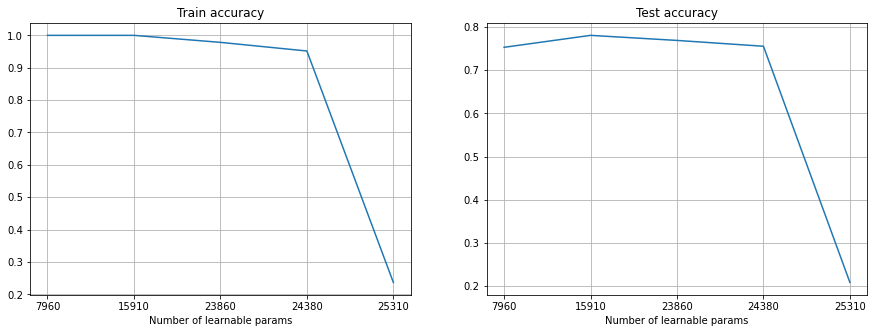

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    
    mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=hl_size,
                    learning_rate_init=.1)
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course


## [ANSWER TO QUESTION 2]

For the single hidden layer, we overfit the training set: we can see it because we have almost zero error. In this case, for the test set we have good test accuracy, but probably if we change the random seed we achieve more error (so in this case we are just lucky for the test set, because we are still overfitting).

The last architecture, otherwise, tends to underfitting the training set because we have a very bad train accuracy.

The best architecture seems to be the fourth one (30,20,) because it's in the middle respect to overfitting and underfitting situations.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


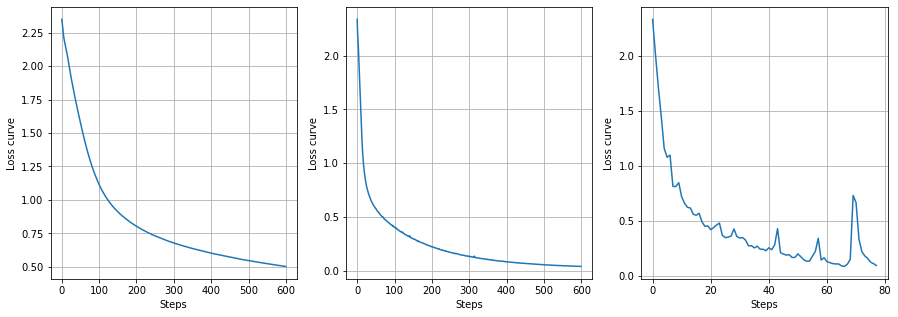

In [11]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = []
loss=[]

for lr in lr_list:
    
    mlp_best = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=(20, ), batch_size=480,
                    learning_rate_init=lr)
    mlp_best.fit(X_train,y_train)
    scores.append(mlp_best.score(X_train,y_train))
    loss.append(mlp_best.loss_curve_)

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(loss[0])
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Loss curve')
ax[0].grid(True)

ax[1].plot(loss[1])
ax[1].set_xlabel('Steps')
ax[1].set_ylabel('Loss curve')
ax[1].grid(True)

ax[2].plot(loss[2])
ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Loss curve')
ax[2].grid(True)

plt.show()

In [12]:
mlp_best = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=(20, ), batch_size=480)
parameters= {'learning_rate_init' : [0.001, 0.01, 0.1]}
clf_best=GridSearchCV(mlp_best, parameters, cv=kf, return_train_score=True)
clf_best.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf_best.best_params_)

print("Score with best parameters:")
print(clf_best.best_score_)


C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.1}
Score with best parameters:
0.78


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?


## [ANSWER TO QUESTION 3]

The first and second curves are similiar to each others, and for both algorithm does not converge. On the other hand, the third one (0.1) reach the convergence in a very fast way respect to the other two, also the loss over the steps is the faster one. Let's notice that the first one falls down in about 200 steps (but loss curve stays > 0.5), the second one falls down in about 100 steps, while the third one in about 20 steps.
We can also see that the third curve is the less stable one (we have a lot of noise along the curve), while the other two seems to be more stable.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.035000
Best NN test error: 0.230250


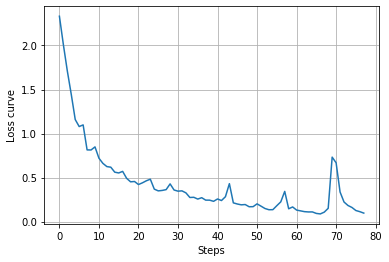

In [13]:
#get training and test error for the best NN model from CV

mlp_best_1 = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=(20, ), batch_size=480,
                    learning_rate_init=.1)
mlp_best_1.fit(X_train,y_train)

training_error=1-mlp_best_1.score(X_train,y_train)
test_error=1-mlp_best_1.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


plt.plot(mlp_best_1.loss_curve_)
plt.xlabel('Steps')
plt.ylabel('Loss curve')
plt.grid(True)


## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [392 410 390 406 411 396 401 408 401 385]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [15]:
# use best architecture and params from before

mlp_best_2 = MLPClassifier(max_iter=200, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=(20, ), batch_size=480,
                    learning_rate_init=.1,verbose=True)
mlp_best_2.fit(X_train,y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error=1-mlp_best_2.score(X_train,y_train)
test_error=1-mlp_best_2.score(X_test,y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.84763850
Iteration 2, loss = 1.23452772
Iteration 3, loss = 0.76589164
Iteration 4, loss = 0.68062249
Iteration 5, loss = 0.62969069
Iteration 6, loss = 0.58261996
Iteration 7, loss = 0.55837727
Iteration 8, loss = 0.57122066
Iteration 9, loss = 0.51077730
Iteration 10, loss = 0.49655930
Iteration 11, loss = 0.52024042
Iteration 12, loss = 0.45575724
Iteration 13, loss = 0.46824275
Iteration 14, loss = 0.42948140
Iteration 15, loss = 0.41237236
Iteration 16, loss = 0.42745466
Iteration 17, loss = 0.42626269
Iteration 18, loss = 0.38193611
Iteration 19, loss = 0.38175458
Iteration 20, loss = 0.39700323
Iteration 21, loss = 0.37408952
Iteration 22, loss = 0.34858071
Iteration 23, loss = 0.34798276
Iteration 24, loss = 0.35950062
Iteration 25, loss = 0.33220118
Iteration 26, loss = 0.32695458
Iteration 27, loss = 0.31927303
Iteration 28, loss = 0.36156937
Iteration 29, loss = 0.30575098
Iteration 30, loss = 0.29884906
Iteration 31, loss = 0.36297559
Iteration 32, los

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

With 600 data points I get a training error almost equal to zero (overfitting) and a test error of 0.23.
With 4000 data points I get a training error bigger than the one achieved before (now it's 0.13), but we get a best test error (0.21). We know that with more data we can get better performance on our data. Let's notice that with 4000 training points, algorithm stops after 100 iterations because we do not achieve improving in the loss curve.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


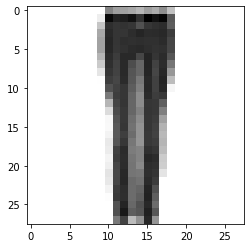

LABEL: 1


In [16]:
NN_prediction = mlp_best_1.predict(X_test)
large_NN_prediction = mlp_best_2.predict(X_test)

misclass=[]

for i in range(len(y_train)):
    if (NN_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        misclass.append(i)
    
plot_input(X_test,y_test,np.random.choice(misclass, 1))

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


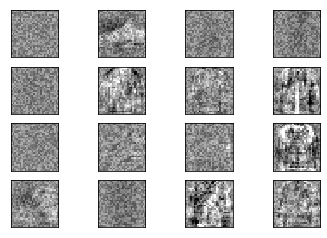

Weights with 4000 data points:


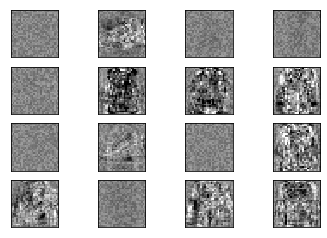

In [17]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_1.coefs_[0].min(), mlp_best_1.coefs_[0].max()
for coef, ax in zip(mlp_best_1.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_2.coefs_[0].min(), mlp_best_2.coefs_[0].max()
for coef, ax in zip(mlp_best_2.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

We observe that we for 4000 data points we have the weights better defined (we can also recognize some clothes from the images), while with 600 data points we have more noise in the image.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [18]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(kernel='rbf', C=50, gamma=0.005)
best_SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1-best_SVM.score(X_train,y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1-best_SVM.score(X_test,y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.0031999999999999806
Test error SVM:
0.14880000000000004


In [19]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1,max_iter=10000)

# you can re-use your code from Lab 2

regL2.fit(X_train,y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1-regL2.score(X_train,y_train)
test_error =  1-regL2.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.046400
Test error (reg): 0.175600


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

Lower training error is achieved with SVM
Lower test error is achieved with SVM.
So with SVM we achieve the best results. Notice that in this case we have a training set of 4000/5000 samples. Maybe with smaller training set SVM is not the best predictor anymore.